In [71]:
import glob
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [72]:
plt.rcParams.update({'font.size': 20})

# Baseline Experiment of Full Algorithm

In [73]:
exp_data = None

with open("./experiments/baseline/exp_200403-235142404987.json") as f:
    exp_data = json.load(f)

## Best vs. Random Search vs. Random L2-Sum Error

In [74]:
data = []

for run in range(20):
    data.append({
        "best_l2": exp_data["best_l2s"][run],
        "rand_search_l2": exp_data["rs_l2s"][run],
        "rand_l2": exp_data["rand_l2s"][run],
    })
    
data = pd.DataFrame(data)

In [75]:
# P Value of Best L2-Sum vs. Random Search L2-Sum
s, p = scipy.stats.wilcoxon(data["best_l2"], data["rand_search_l2"], alternative="less")
print(f"Best vs. Random Search p-value: {p:.4} (4 s.f.)")

# P Value of Best L2-Sum vs. Random L2-Sum
s, p = scipy.stats.wilcoxon(data["best_l2"], data["rand_l2"], alternative="less")
print(f"Best vs Random p-value: {p:.4} (4 s.f.)")

Best vs. Random Search p-value: 0.0007536 (4 s.f.)
Best vs Random p-value: 4.429e-05 (4 s.f.)


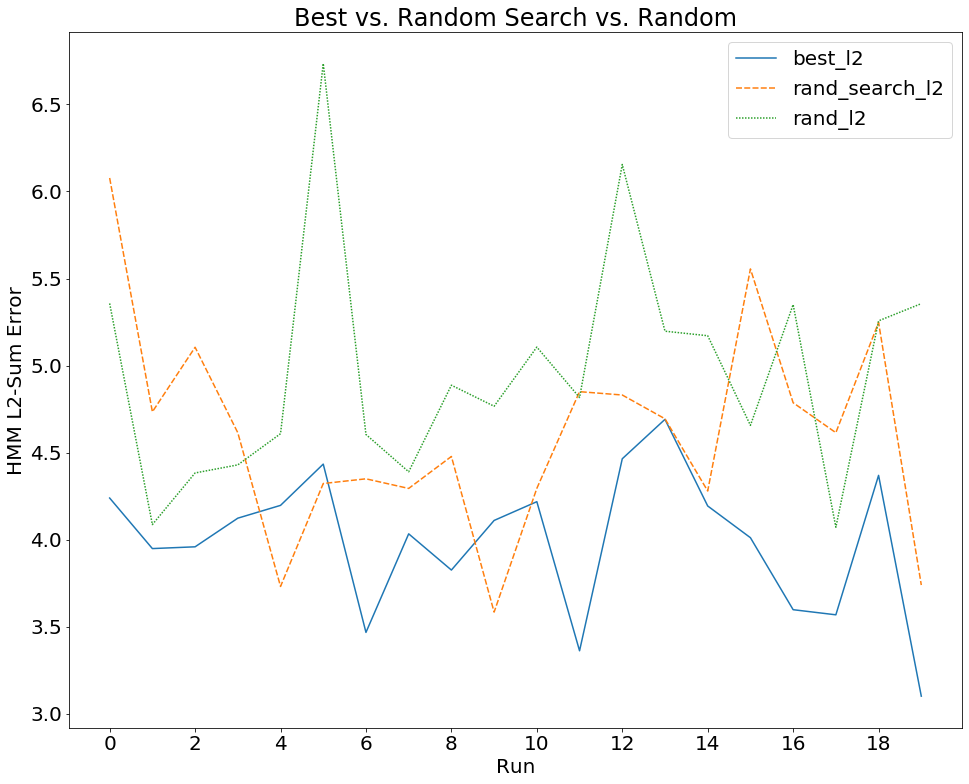

In [76]:
plt.figure(figsize=(16, 12.8))
ax = sns.lineplot(data=data)
_ = ax.set(
    title="Best vs. Random Search vs. Random",
    xlabel="Run",
    xticks=list(range(0, 20, 2)),
    ylabel="HMM L2-Sum Error"
)

## Mean Fitness of EA Population by Generation

In [8]:
data = []

for run in range(20):
    for gen in range(50):
        data.append({
            "run": run,
            "gen": gen,
            "mean_fitness": exp_data["mean_fitnesses"][run][gen],
        })
    
data = pd.DataFrame(data)

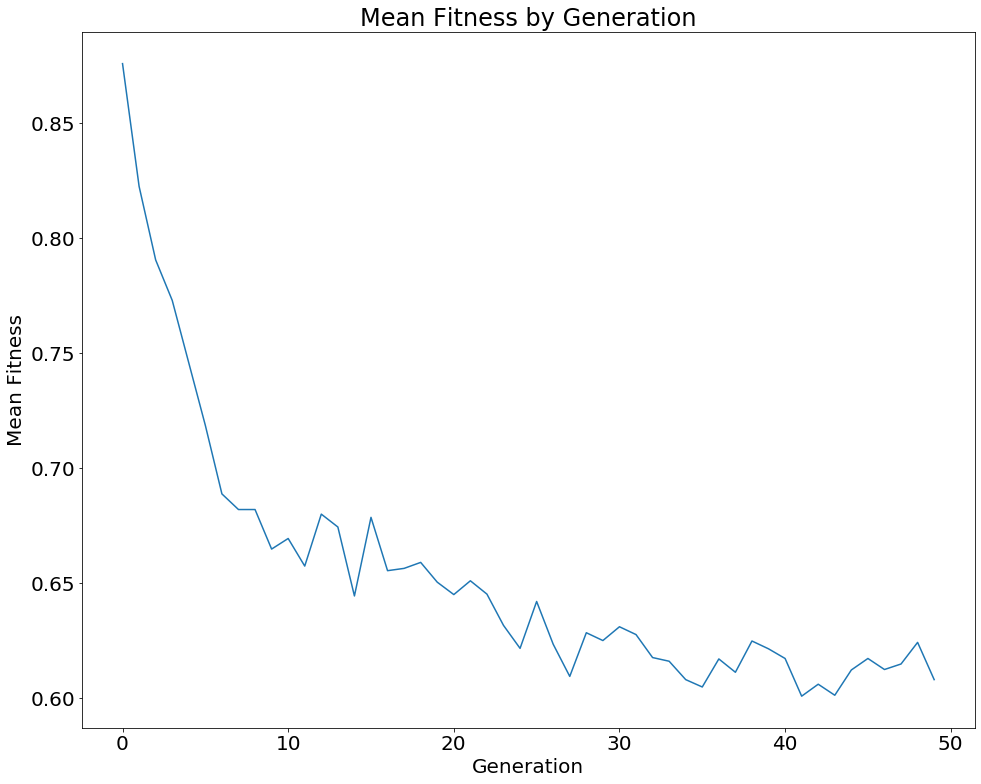

In [10]:
plt.figure(figsize=(16, 12.8))
ax = sns.lineplot(
    x="gen",
    y="mean_fitness",
    data=data[data["run"] == 1],
)
_ = ax.set(title="Mean Fitness by Generation", xlabel="Generation", ylabel="Mean Fitness")

# Uniform vs. Gaussian Mutation Experiment

# States and Symbols Scalability Experiment

In [77]:
exp_data = []

for fp in glob.glob("./experiments/states_symbols_2/*.json"):
    with open(fp) as f:
        exp_data.append(json.load(f))
        
# Sort the experiment data by states and then symbols
exp_data = sorted(
    exp_data,
    key=lambda k: (k["params"]["states"], k["params"]["symbols"])
)

In [78]:
# Convert experiment data to format that can be plotted by Seaborn
data = []

for exp in exp_data:
    params = exp["params"]
    states, symbols = params["states"], params["symbols"]
    for run in range(20):
        data.append({ 
            "states": states,
            "symbols": symbols,
            "label": (states, symbols),
            "model": "best_l2",
            "run": run,
            "loss_scaled": exp["best_l2s"][run] / states,
        })
        data.append({ 
            "states": states,
            "symbols": symbols,
            "label": (states, symbols),
            "model": "rand_search_l2",
            "run": run,
            "loss_scaled": exp["rs_l2s"][run] / states,
        })
        data.append({ 
            "states": states,
            "symbols": symbols,
            "label": (states, symbols),
            "model": "rand_l2",
            "run": run,
            "loss_scaled": exp["rand_l2s"][run] / states,
        })
    
data = pd.DataFrame(data)

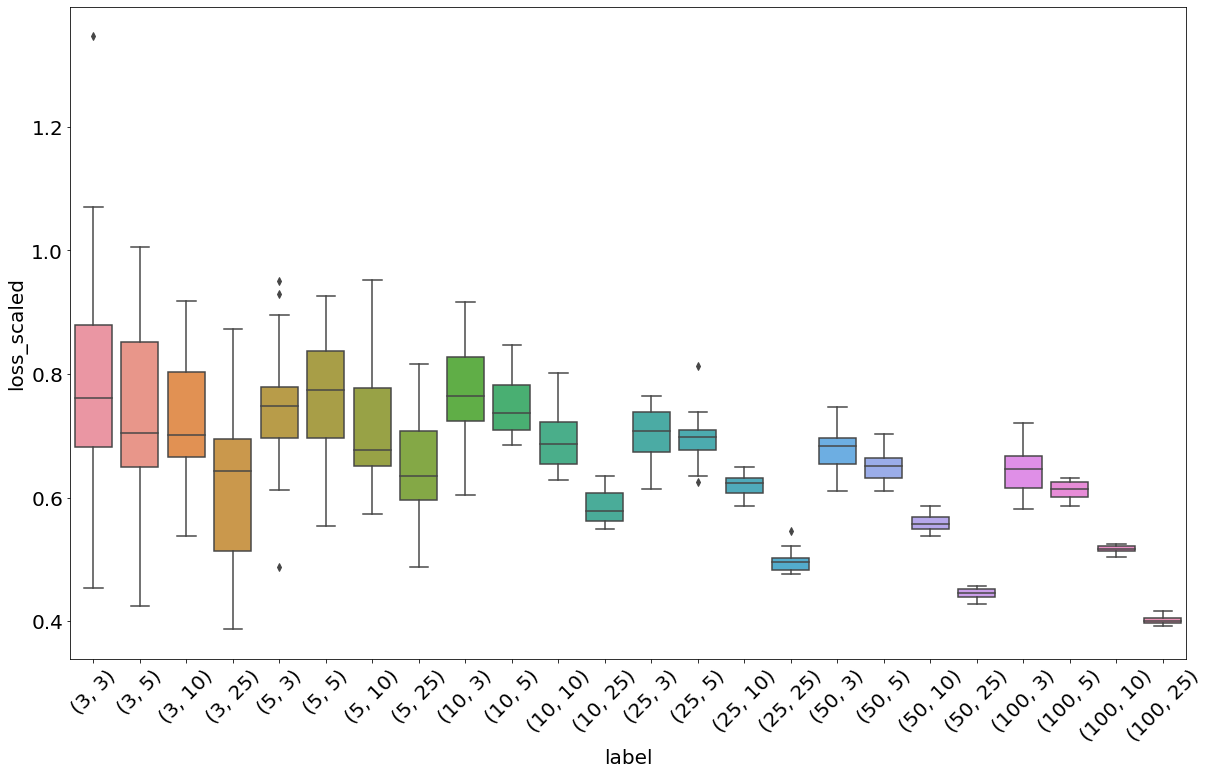

In [67]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=45)

ax = sns.boxplot(
    x="label",
    y="loss_scaled",
    data=data[data["model"] == "best_l2"],
)

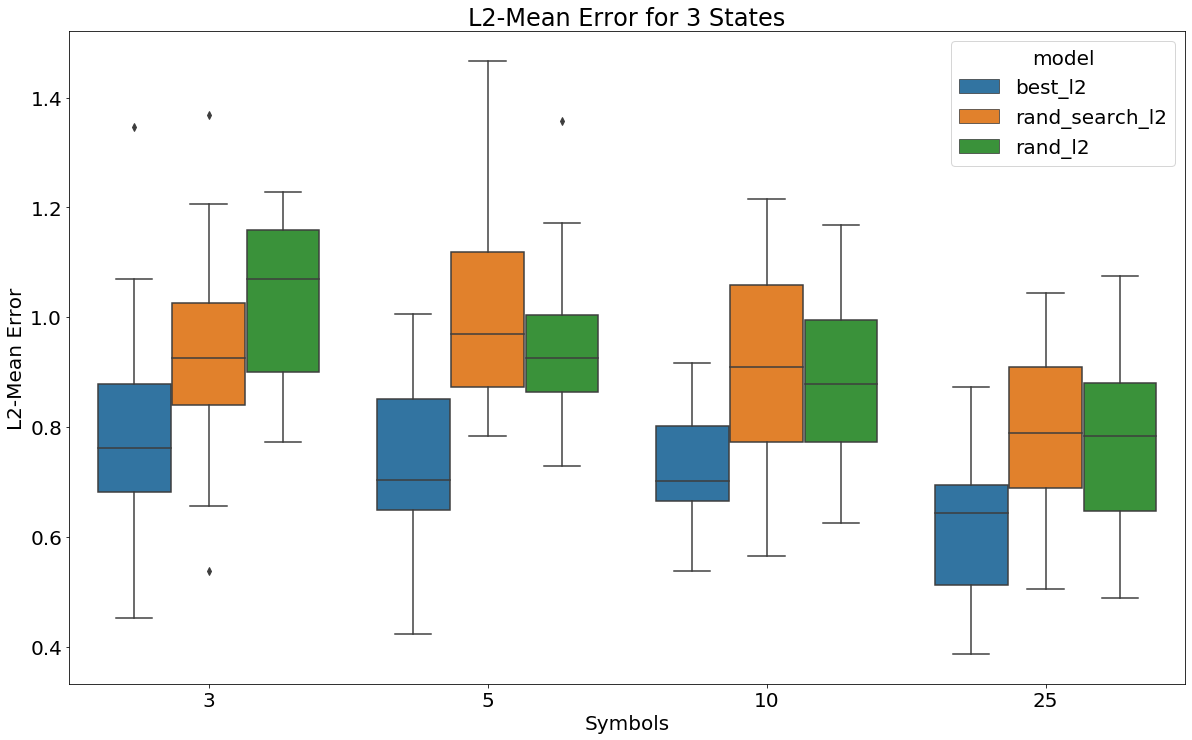

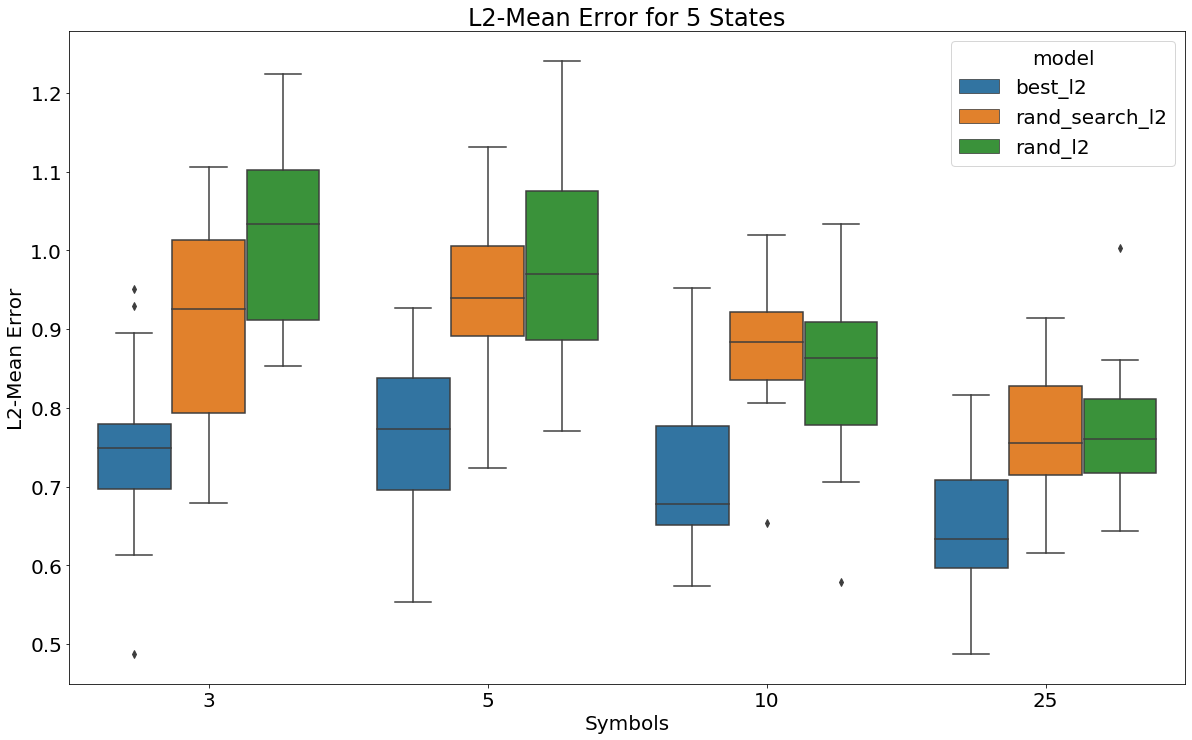

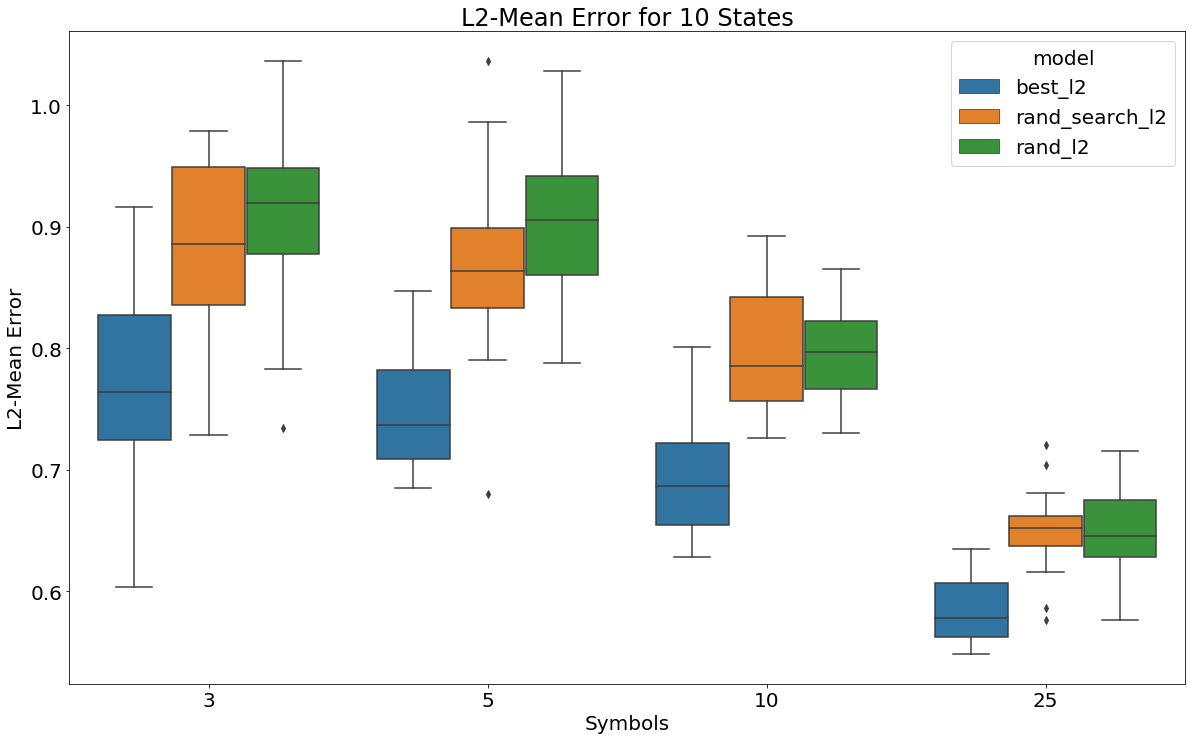

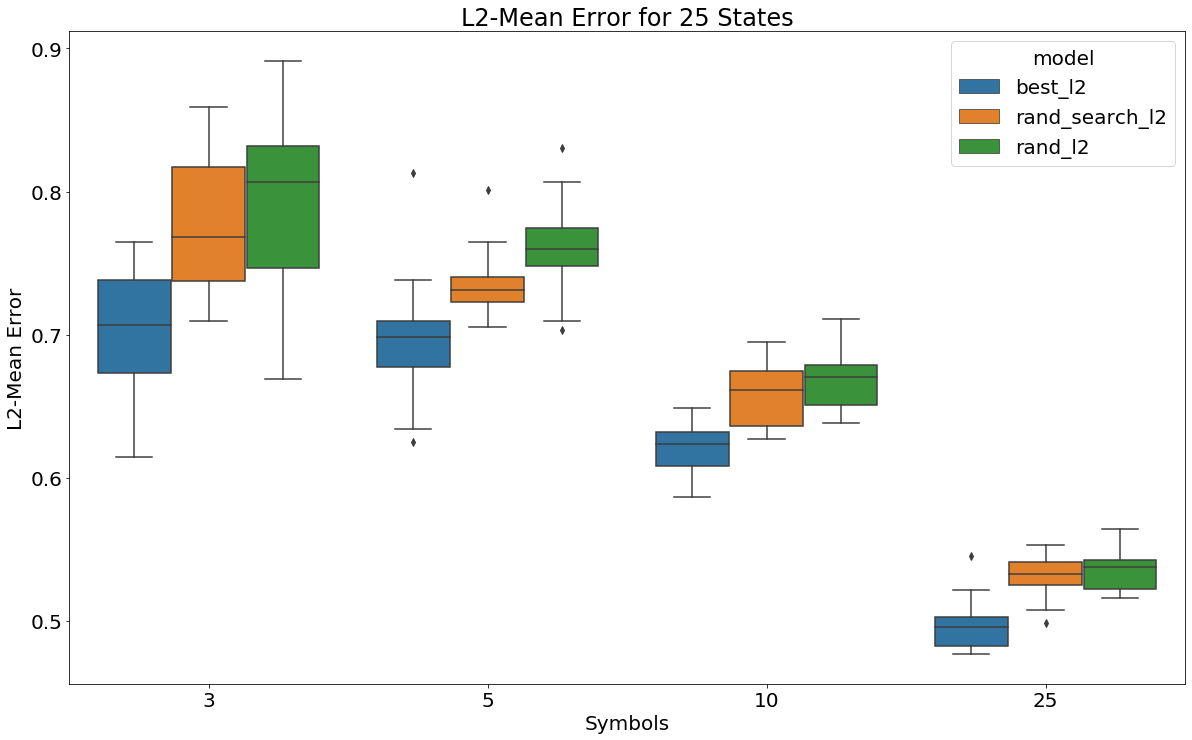

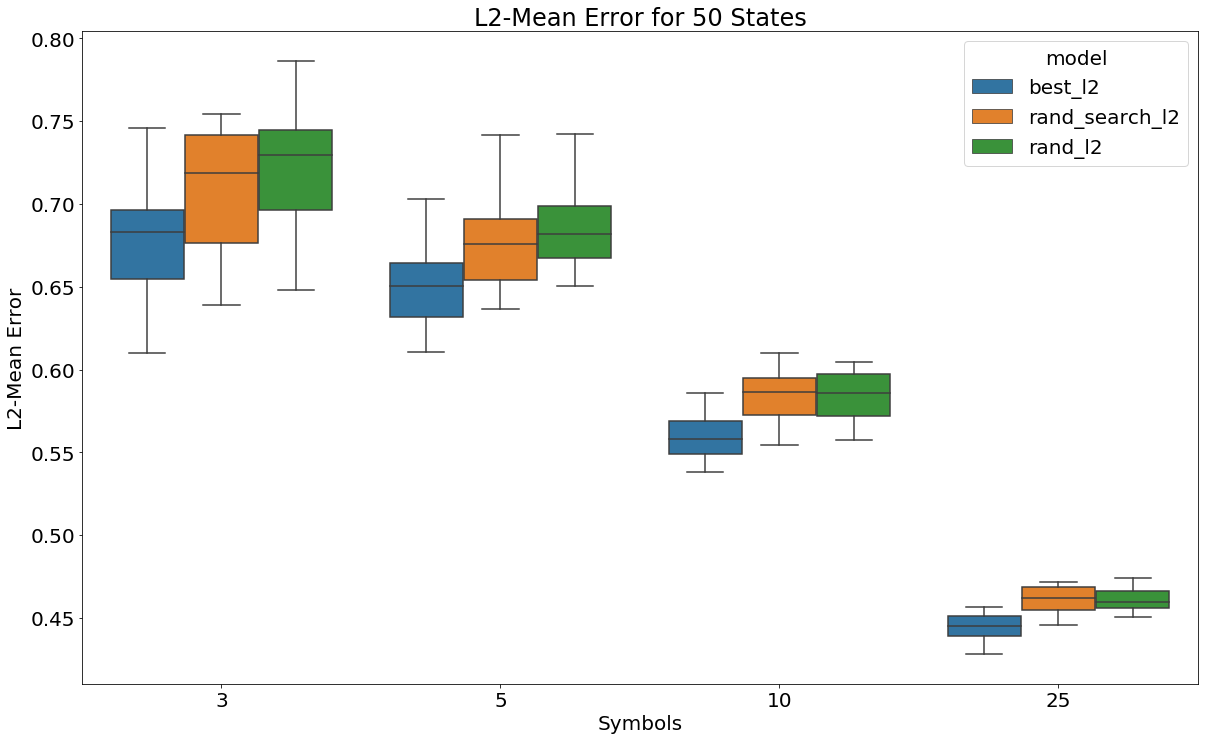

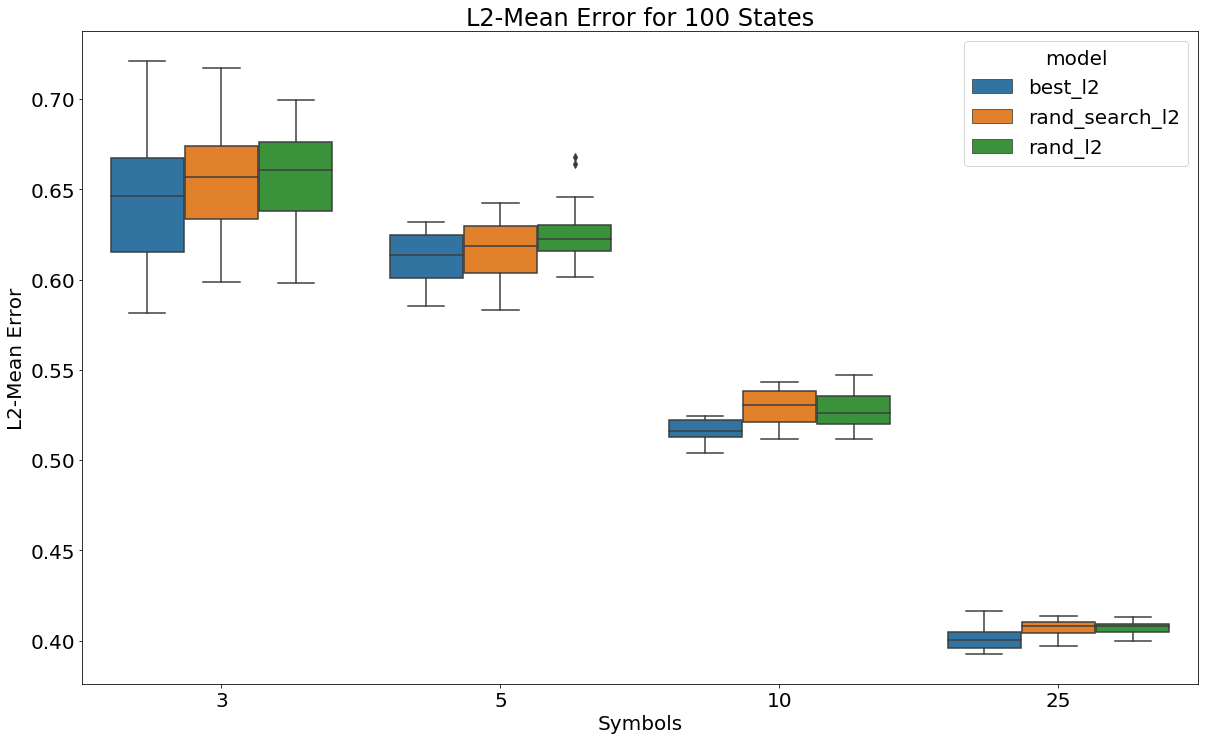

In [85]:
for states in [3, 5, 10, 25, 50, 100]:
    plt.figure(figsize=(20, 12))

    ax = sns.boxplot(
        x="symbols",
        y="loss_scaled",
        hue="model",
        data=data[data["states"] == states],
    )
    _ = ax.set(title=f"L2-Mean Error for {states} States", xlabel="Symbols", ylabel="L2-Mean Error")

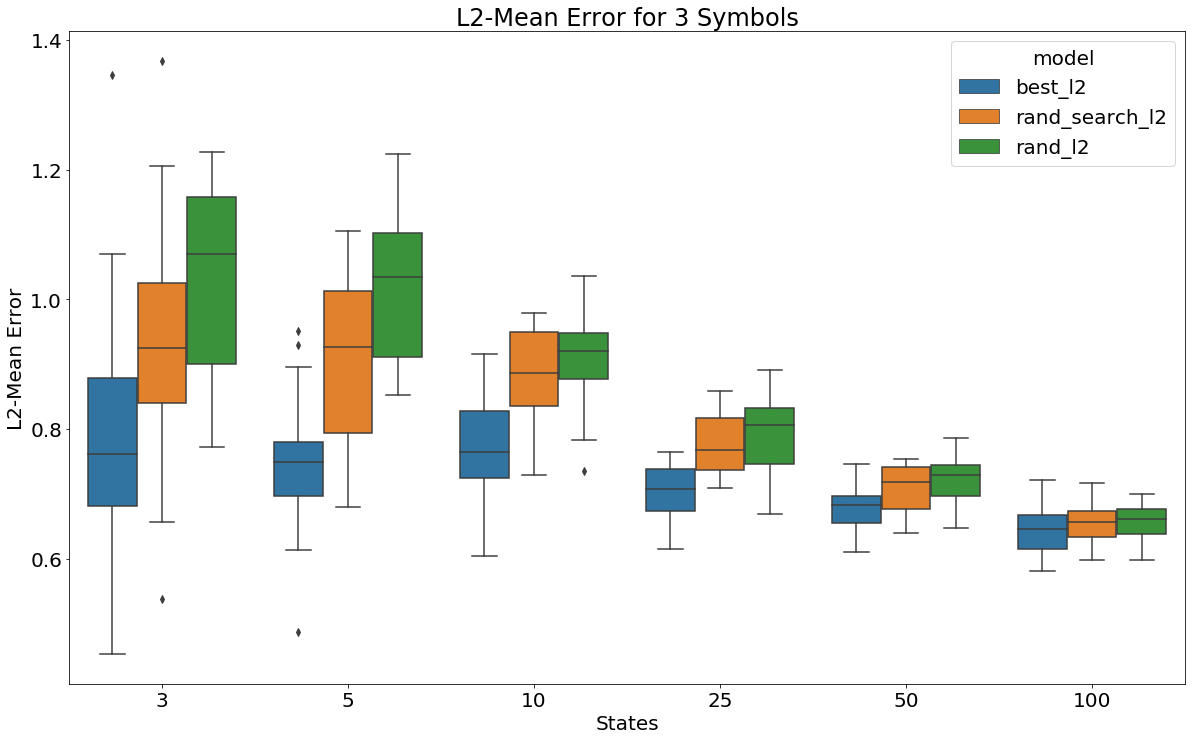

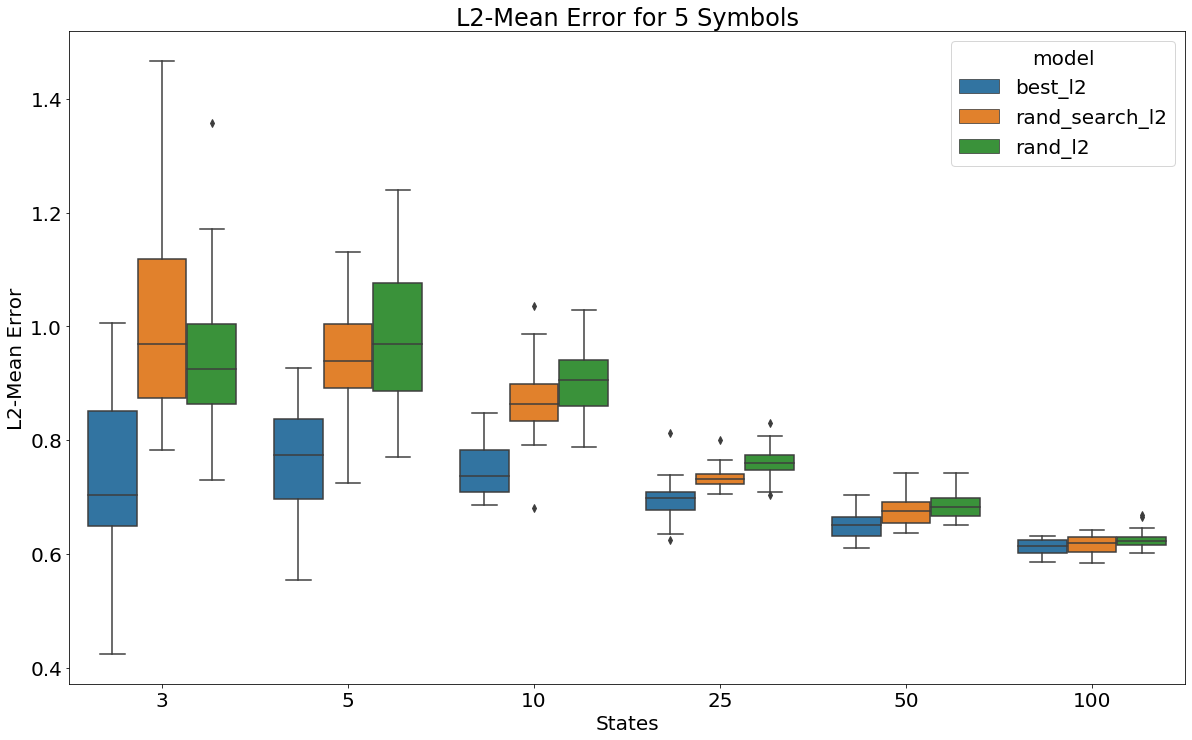

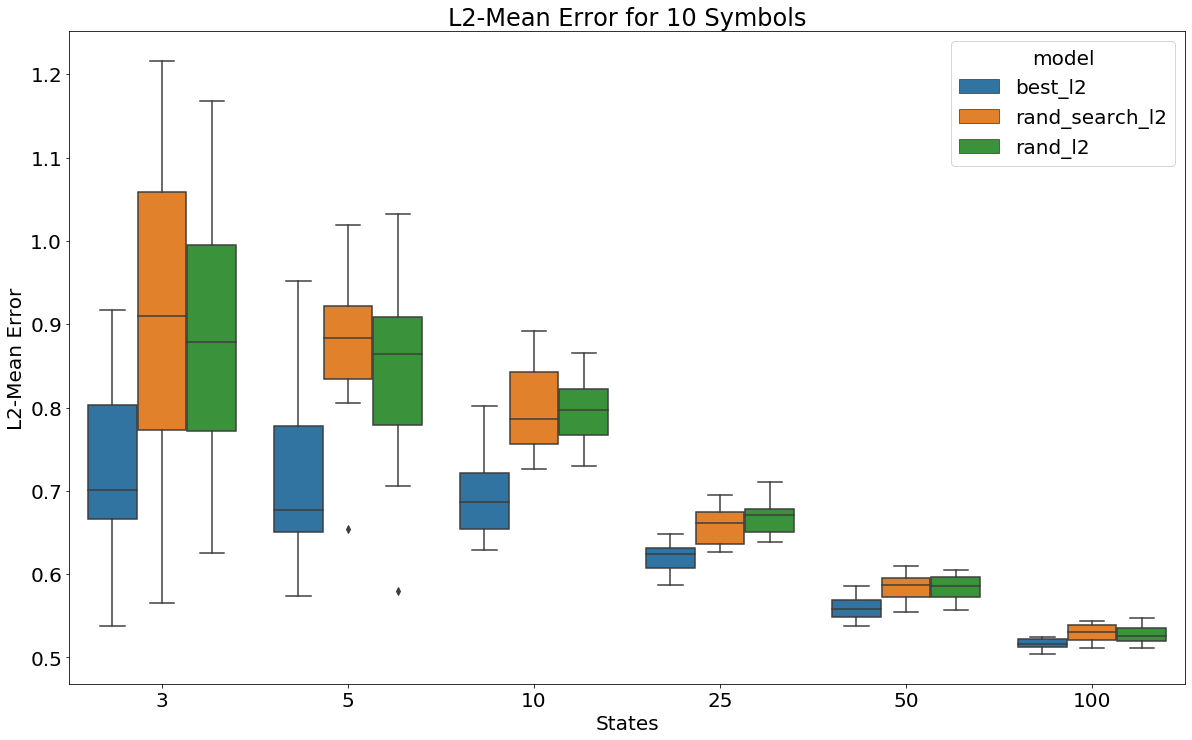

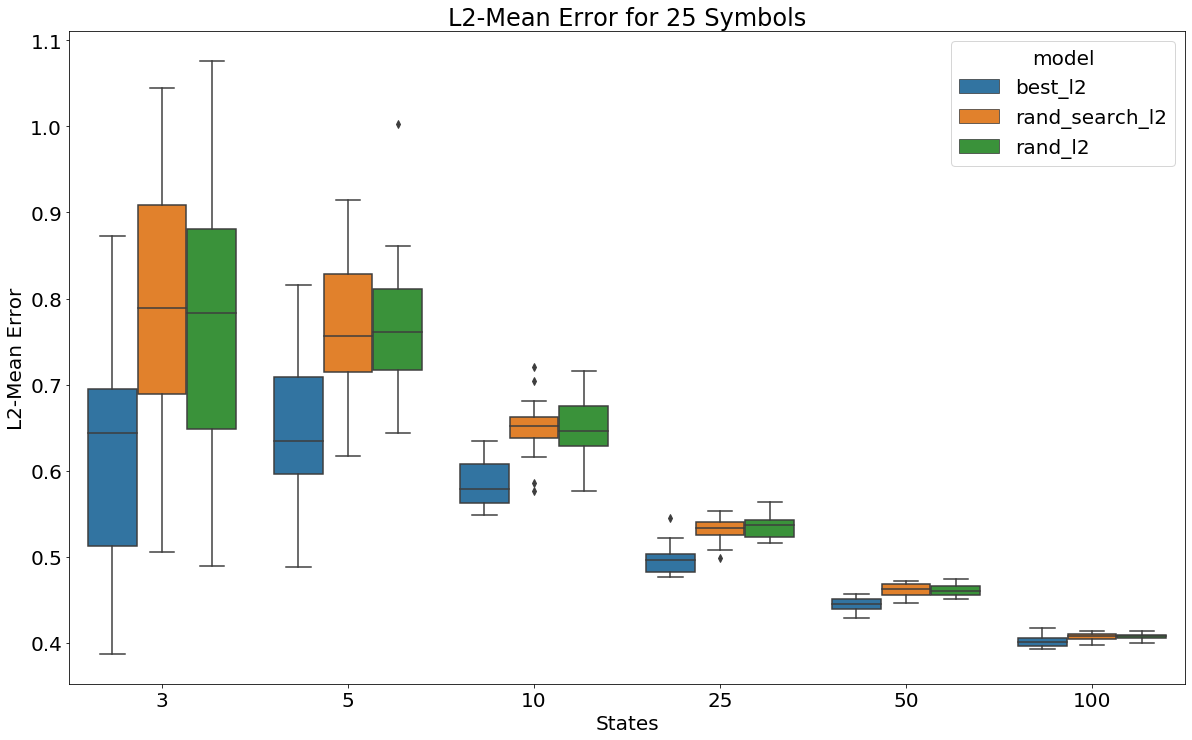

In [86]:
for symbols in [3, 5, 10, 25]:
    plt.figure(figsize=(20, 12))

    ax = sns.boxplot(
        x="states",
        y="loss_scaled",
        hue="model",
        data=data[data["symbols"] == symbols],
    )
    _ = ax.set(title=f"L2-Mean Error for {symbols} Symbols", xlabel="States", ylabel="L2-Mean Error")